Sowmya Myla 700741181

# 1.Pandas
#1.Read the provided CSV file ‘data.csv
https://drive.google.com/drive/folders/1h8C3mLsso-R-sIOLsvoYwPLzy2fJ4IOF?usp=sharing


In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("data.csv")
data.head()

Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0

# 2. Show the basic statistical description about the data.

In [3]:
data.describe()

Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000

# 3. Check if the data has null values.

In [4]:
data.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

# a. Replace the null values with the mean

In [5]:
data.fillna(data.mean(), inplace=True)
data.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

# 4. Select at least two columns and aggregate the data using: min, max, count, mean.

In [6]:
data.agg({'Duration':['min','max','count','mean'],'Pulse':['min','max','count','mean']})

Duration       Pulse
min     15.000000   80.000000
max    300.000000  159.000000
count  169.000000  169.000000
mean    63.846154  107.461538

# 5. Filter the dataframe to select the rows with calories values between 500 and 1000.

In [7]:
data.loc[(data['Calories']>500)&(data['Calories']<1000)]

Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
90        180    101       127     600.1
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3

# 6. Filter the dataframe to select the rows with calories values > 500 and pulse < 100

In [8]:
data.loc[(data['Calories']>500)&(data['Pulse']<100)]

Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3

# 7. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”

In [9]:
df_modified = data[['Duration','Pulse','Calories']]
df_modified.head()

Duration  Pulse  Calories
0        60    110     409.1
1        60    117     479.0
2        60    103     340.0
3        45    109     282.4
4        45    117     406.0

# 8. Delete the “Maxpulse” column from the main df dataframe

In [10]:
del data['Maxpulse']

In [11]:
data.head()

Duration  Pulse  Calories
0        60    110     409.1
1        60    117     479.0
2        60    103     340.0
3        45    109     282.4
4        45    117     406.0

# 9. Convert the datatype of Calories column to int datatype.

In [12]:
data.dtypes

Duration      int64
Pulse         int64
Calories    float64
dtype: object

In [13]:
data['Calories'] = data['Calories'].astype(np.int64)
data.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

# 10. Using pandas create a scatter plot for the two columns (Duration and Calories).

<Axes: xlabel='Duration', ylabel='Calories'>

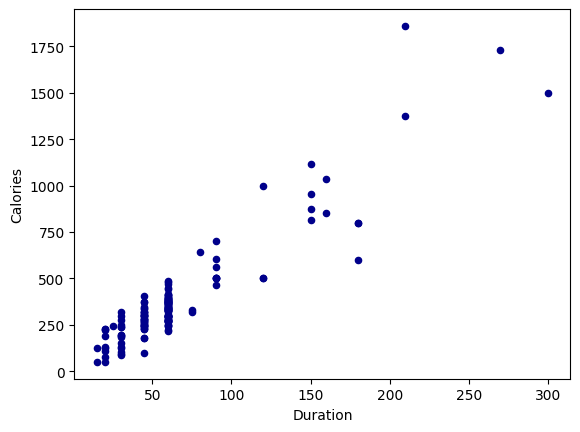

In [14]:
data.plot.scatter(x='Duration',y='Calories',c='DarkBlue')

# 2. (Glass Dataset)
1. Implement Naïve Bayes method using scikit-learn library.
a. Use the glass dataset available in Link also provided in your assignment.

In [24]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix


# Suppress warnings
warnings.filterwarnings("ignore")

In [25]:
glass=pd.read_csv("glass.csv") #importing glass dataset from given link

In [26]:
glass.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [27]:
des=glass.corr()
glass.corr().style.background_gradient(cmap="Greens")

# b. Use train_test_split to create training and testing part

In [28]:
features = ['Rl', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = 'Type'


X_train, X_val, Y_train, Y_val = train_test_split(glass[::-1], glass[target],test_size=0.2, random_state=1)

# 2. Evaluate the model on testing part using score and classification_report(y_true, y_pred)

In [29]:
classifier = GaussianNB()

classifier.fit(X_train, Y_train)


y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('\naccuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.92      0.92      0.92        12
           3       1.00      0.50      0.67         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.75      0.75      0.75         4

    accuracy                           0.84        43
   macro avg       0.76      0.69      0.71        43
weighted avg       0.89      0.84      0.85        43

[[18  1  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 1  0  3  2  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  1  0  3]]

accuracy is 0.8372093023255814


# 1. Implement linear SVM method using scikit library

In [31]:
from sklearn.svm import SVC, LinearSVC
classifier = LinearSVC()

classifier.fit(X_train, Y_train)

LinearSVC()

# 2. Evaluate the model on testing part using score and classification_report(y_true, y_pred)

In [32]:
y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('\naccuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.88      0.58      0.70        12
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.24      1.00      0.38         4

    accuracy                           0.67        43
   macro avg       0.35      0.42      0.34        43
weighted avg       0.71      0.67      0.66        43

[[18  1  0  0  0  0]
 [ 0  7  0  0  0  5]
 [ 0  0  0  0  0  6]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  4]]

accuracy is 0.6744186046511628


# Do at least two visualizations to describe or show correlations in the Glass Dataset. 

<Axes: >

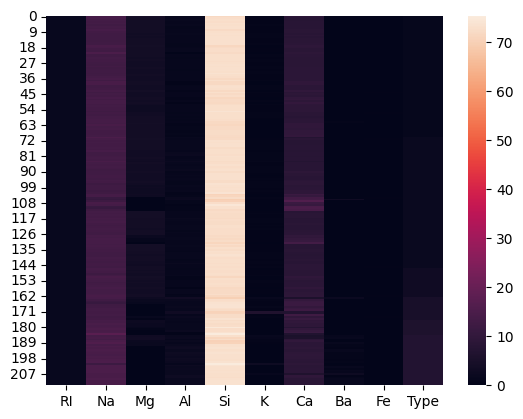

In [33]:
sns.heatmap(data=glass) #HeatMap Visualization for above dataset

<Axes: >

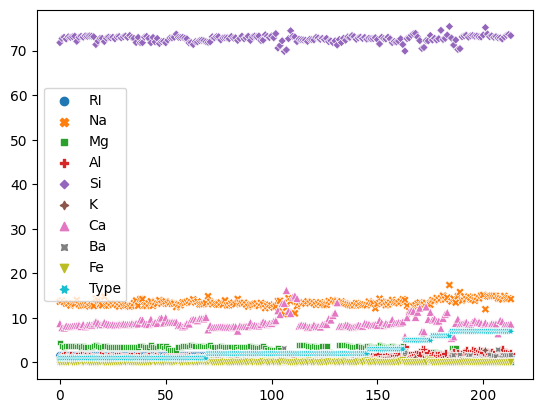

In [34]:
sns.scatterplot(data=glass)  #ScatterPlot Visualization for above dataset

# Which algorithm you got better accuracy? Can you justify why?

According to the above accuracy scores Naive Bayes method is best for data visualization than that of Support Vector Machine method. The performance of the each algorithm depends on several factors. So, few algorithms works well for only few of the problems and does not work well for other problems. By evaluating the model using various algorithms we can compare and then state which one is best.